In [39]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


   Part1: Load the data into a Pandas DataFrame, name it as df_myopia and fetch the top 10 rows.

In [18]:
# Data loading
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [19]:
# List dataframe data types
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

Remove the "MYOPIC" column from the dataset.
Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!

In [20]:
# Remove the CustomerID Column
df_myopia= df_myopia.drop(columns=["MYOPIC"])
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


Remove all rows with null values if any.

In [21]:
# Find null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")


Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


Remove duplicate entries if any.

In [22]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


Standardize  dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [23]:
# A list of the columns from the original DataFrame
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [24]:
# Scale the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [25]:
# Create a DataFrame with the transformed data
new_df_myopia = pd.DataFrame(scaled_data, columns=df_myopia.columns)
new_df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


Save the cleaned DataFrame as a CSV file, name it as myopia_data_cleaned.csv.

In [26]:
# Saving cleaned data
file_path = Path("Resources/myopia_data_cleaned.csv")
new_df_myopia.to_csv(file_path, index=False)
new_df_myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


part 2 :Applying  Dimensionality Reduction with PCA(principal component analysis)
In this activity, you will use PCA to reduce the dimensions of the myopia dataset from 14 to 2 features. After applying PCA, we will use the principal components data, to fit a K-Means model with k=3 and make some conclusions.

In [29]:
# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(new_df_myopia)

In [32]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"]
)
df_myopia_pca.head()

,principal component 1,principal component 2
0,0.535503,1.145004
1,-0.624706,-1.575786
2,-0.933479,-0.717076
3,0.106354,1.192475
4,-0.388503,-2.839655


In [33]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716])

 Analysis
 
According to the explained variance, the first principal component contains approximately 21% of the variance and the second principal component contains 16% of the variance. We have approximately 37% of the information in the original dataset, and we will see whether increasing the number of principal components to 3 will increase the explained variance.

In [36]:
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(new_df_myopia)

In [37]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2","principal component 3"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3
0,0.535503,1.145004,-1.385019
1,-0.624706,-1.575786,-0.794253
2,-0.933479,-0.717076,0.820150
3,0.106354,1.192475,-0.024441
4,-0.388503,-2.839655,-0.229767


In [38]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023])

Analysis

With three principal components, we have 45% of the information in the original dataset.

Reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, we have to run t-SNE on the principal components, which is the output of the PCA transformation.

In [41]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [42]:
# Reduce dimensions
tsne_features = tsne.fit_transform(new_df_myopia)

C:\Users\Sridevi\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [43]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [45]:
# Prepare to plot the dataset

# The first column of transformed features
new_df_myopia['x'] = tsne_features[:,0]

# The second column of transformed features
new_df_myopia['y'] = tsne_features[:,1]

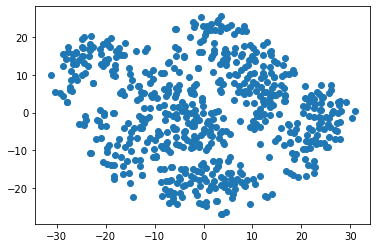

In [46]:
# Visualize the clusters
plt.scatter(new_df_myopia['x'], new_df_myopia['y'])
plt.show()

Doubt : how to create label to plot . 
Reference
http://localhost:8890/notebooks/Desktop/Classwork_Python/20-Unsupervised-Machine-Learning/2/Activities/04-Ins_tSNE/Solved/t-SNE.ipynb

Part 3: Perform a Cluster Analysis with K-means

In [49]:
#Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df_myopia)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Sridevi\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,236365.688327
1,2,143941.800723
2,3,89095.486232
3,4,62746.455183
4,5,49262.176003


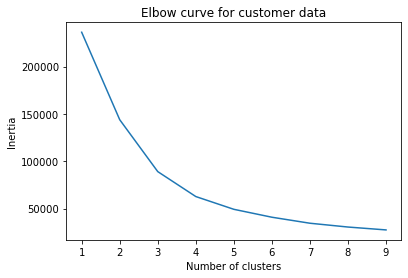

In [51]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Create a function called get_clusters(k, data) that finds the k clusters using K-Means on data. The function should return a DataFrame copy of Data that should include a new column containing the clusters found.

In [54]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    
    return data

Create a 2D-Scatter plot to analyze the clusters using x="AGE" and y="MOMMY".

In [55]:
#Analyzing Clusters with the Best Value of k
clusters = get_clusters(4, new_df_myopia)

In [56]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,-12.535581,-16.430666,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,-3.444330,-0.041840,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,24.363466,4.092643,3
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,-8.951369,-14.823553,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,10.163622,16.993162,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769,6.173026,3.210233,2
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241,-3.771620,0.418825,1
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241,-2.297147,2.194997,2
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769,19.283899,-7.040683,3


In [58]:
def show_clusters(df):
    plt.scatter(df['AGE'], df['MOMMY'], c=df['class'])
    plt.xlabel('AGE')
    plt.ylabel('MOMMY')
    plt.show()

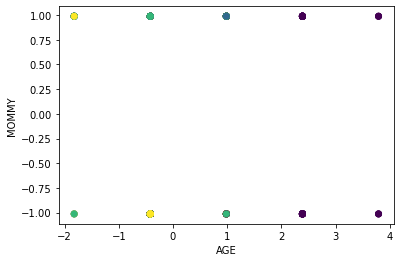

In [59]:
show_clusters(clusters)